In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data.zip')

In [3]:
del df[df.columns[0]]

In [4]:
df.head(5)

timestamp  sensor_00  sensor_01  sensor_02  sensor_03  sensor_04  \
0  2018-04-01 00:00:00   2.465394   47.09201    53.2118  46.310760   634.3750   
1  2018-04-01 00:01:00   2.465394   47.09201    53.2118  46.310760   634.3750   
2  2018-04-01 00:02:00   2.444734   47.35243    53.2118  46.397570   638.8889   
3  2018-04-01 00:03:00   2.460474   47.09201    53.1684  46.397568   628.1250   
4  2018-04-01 00:04:00   2.445718   47.13541    53.2118  46.397568   636.4583   

   sensor_05  sensor_06  sensor_07  sensor_08  ...  sensor_43  sensor_44  \
0   76.45975   13.41146   16.13136   15.56713  ...   41.92708  39.641200   
1   76.45975   13.41146   16.13136   15.56713  ...   41.92708  39.641200   
2   73.54598   13.32465   16.03733   15.61777  ...   41.66666  39.351852   
3   76.98898   13.31742   16.24711   15.69734  ...   40.88541  39.062500   
4   76.58897   13.35359   16.21094   15.69734  ...   41.40625  38.773150   

   sensor_45  sensor_46  sensor_47  sensor_48  sensor_49  sensor_50  \
0   65.68287   50.92593  38.194440   157.9861   67.70834   243.0556   
1   65.68287   50.92593  38.194440   157.9861   67.70834   243.0556   
2   65.39352   51.21528  38.194443   155.9606   67.12963   241.3194   
3   64.81481   51.21528  38.194440   155.9606   66.84028   240.4514   
4   65.10416   51.79398  38.773150   158.2755   66.55093   242.1875   

   sensor_51  machine_status  
0   201.3889          NORMAL  
1   201.3889          NORMAL  
2   203.7037          NORMAL  
3   203.1250          NORMAL  
4   201.3889          NORMAL  

[5 rows x 54 columns]

In [5]:
SEED = 42
TARGET = 'machine_status'
FEATURES = df.columns.drop(TARGET)

NUMERICAL = df[FEATURES].select_dtypes('number').columns
print(f"Numerical features: {', '.join(NUMERICAL)}")

print('')

CATEGORICAL = pd.Index(np.setdiff1d(FEATURES, NUMERICAL))
print(f"Categorical features: {', '.join(CATEGORICAL)}")

Numerical features: sensor_00, sensor_01, sensor_02, sensor_03, sensor_04, sensor_05, sensor_06, sensor_07, sensor_08, sensor_09, sensor_10, sensor_11, sensor_12, sensor_13, sensor_14, sensor_15, sensor_16, sensor_17, sensor_18, sensor_19, sensor_20, sensor_21, sensor_22, sensor_23, sensor_24, sensor_25, sensor_26, sensor_27, sensor_28, sensor_29, sensor_30, sensor_31, sensor_32, sensor_33, sensor_34, sensor_35, sensor_36, sensor_37, sensor_38, sensor_39, sensor_40, sensor_41, sensor_42, sensor_43, sensor_44, sensor_45, sensor_46, sensor_47, sensor_48, sensor_49, sensor_50, sensor_51

Categorical features: timestamp


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220320 entries, 0 to 220319
Data columns (total 54 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   timestamp       220320 non-null  object 
 1   sensor_00       210112 non-null  float64
 2   sensor_01       219951 non-null  float64
 3   sensor_02       220301 non-null  float64
 4   sensor_03       220301 non-null  float64
 5   sensor_04       220301 non-null  float64
 6   sensor_05       220301 non-null  float64
 7   sensor_06       215522 non-null  float64
 8   sensor_07       214869 non-null  float64
 9   sensor_08       215213 non-null  float64
 10  sensor_09       215725 non-null  float64
 11  sensor_10       220301 non-null  float64
 12  sensor_11       220301 non-null  float64
 13  sensor_12       220301 non-null  float64
 14  sensor_13       220301 non-null  float64
 15  sensor_14       220299 non-null  float64
 16  sensor_15       0 non-null       float64
 17  sensor_16 

In [7]:
NULL_COLS = df.columns[df.isnull().all()].tolist()
NUMERICAL = pd.Index(np.setdiff1d(NUMERICAL, NULL_COLS))
NUMERICAL

Index(['sensor_00', 'sensor_01', 'sensor_02', 'sensor_03', 'sensor_04',
       'sensor_05', 'sensor_06', 'sensor_07', 'sensor_08', 'sensor_09',
       'sensor_10', 'sensor_11', 'sensor_12', 'sensor_13', 'sensor_14',
       'sensor_16', 'sensor_17', 'sensor_18', 'sensor_19', 'sensor_20',
       'sensor_21', 'sensor_22', 'sensor_23', 'sensor_24', 'sensor_25',
       'sensor_26', 'sensor_27', 'sensor_28', 'sensor_29', 'sensor_30',
       'sensor_31', 'sensor_32', 'sensor_33', 'sensor_34', 'sensor_35',
       'sensor_36', 'sensor_37', 'sensor_38', 'sensor_39', 'sensor_40',
       'sensor_41', 'sensor_42', 'sensor_43', 'sensor_44', 'sensor_45',
       'sensor_46', 'sensor_47', 'sensor_48', 'sensor_49', 'sensor_50',
       'sensor_51'],
      dtype='object')

# <span style='color:blue;'> Data Cleaning </span>
+ Remove redundant columns
+ Remove duplicates
+ Handle missing values
+ Convert data types to the correct data type

In [8]:
df = df.drop_duplicates()
# Entire "sensor_15" column is NaN therefore remove it from data
del df['sensor_15']
# Let's convert the data type of timestamp column to datatime format
import warnings
warnings.filterwarnings("ignore")
df['date'] = pd.to_datetime(df['timestamp'])
del df['timestamp']

In [9]:
#Function for calculating the percentage of missing values
def calc_percent_NAs(df):
    nans = pd.DataFrame(df.isnull().sum().sort_values(ascending=False)/len(df),columns=['Percentage'])
    idx = nans['Percentage'] > 0
    return nans[idx]

In [10]:
calc_percent_NAs(df).head(10)

Percentage
sensor_50    0.349569
sensor_51    0.069821
sensor_00    0.046333
sensor_07    0.024741
sensor_08    0.023180
sensor_06    0.021777
sensor_09    0.020856
sensor_01    0.001675
sensor_30    0.001185
sensor_29    0.000327

In [11]:
df.machine_status.value_counts()

NORMAL        205836
RECOVERING     14477
BROKEN             7
Name: machine_status, dtype: int64

In [12]:
broken = df[df['machine_status']=='BROKEN']

In [13]:
df.set_index('date',inplace=True)

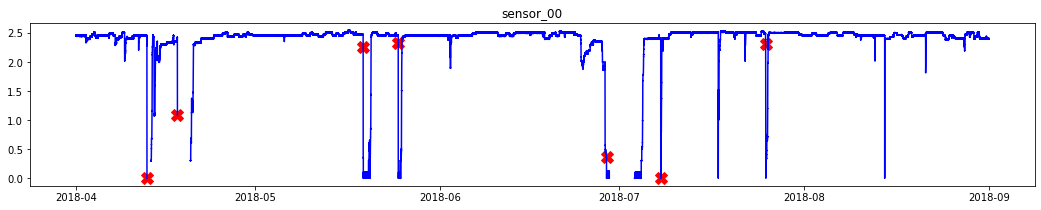

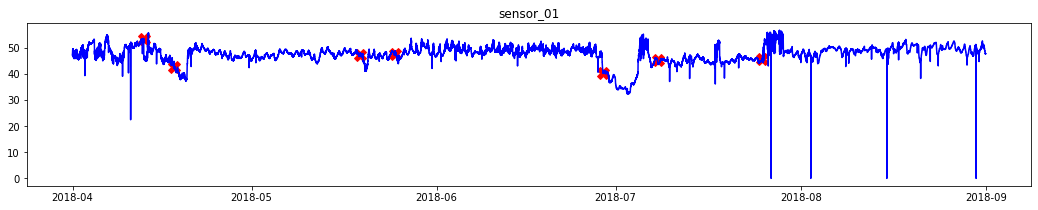

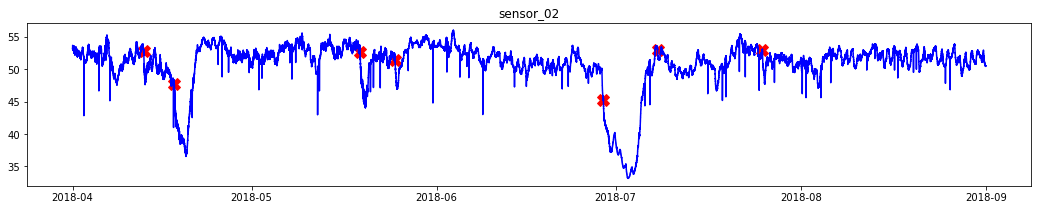

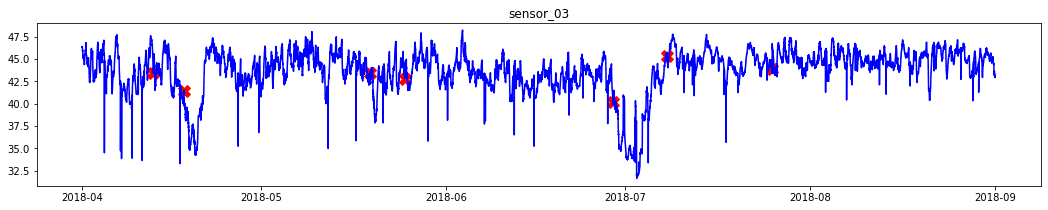

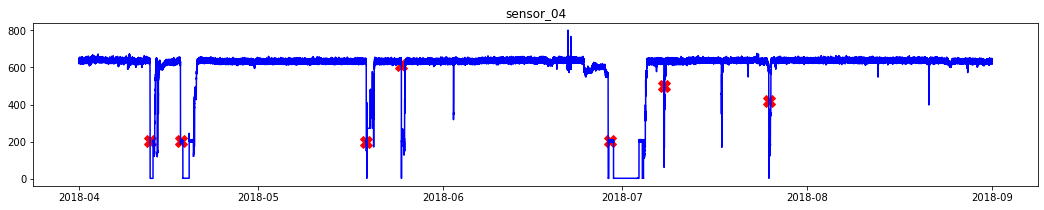

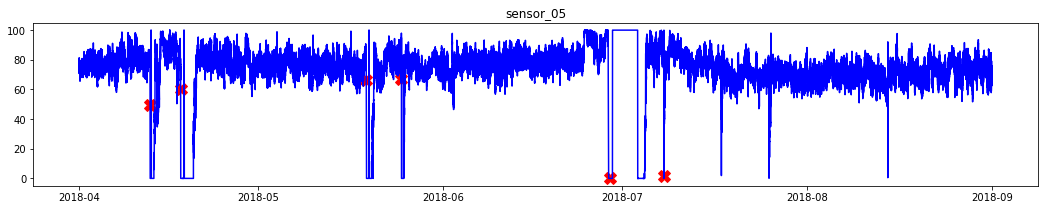

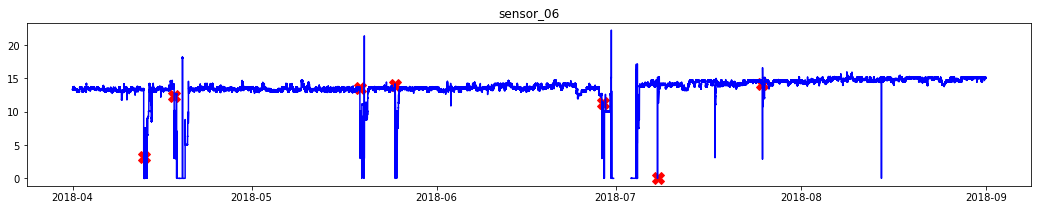

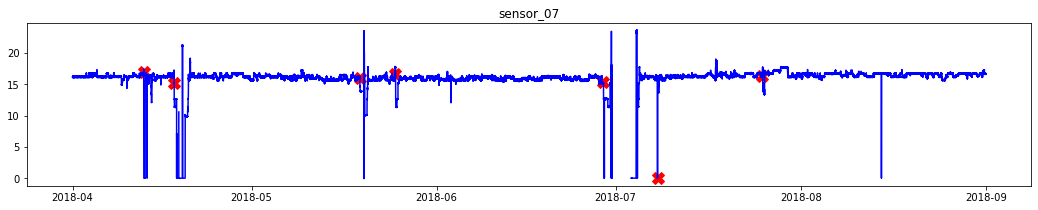

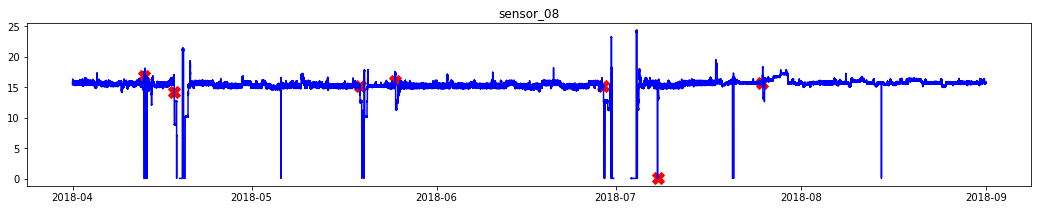

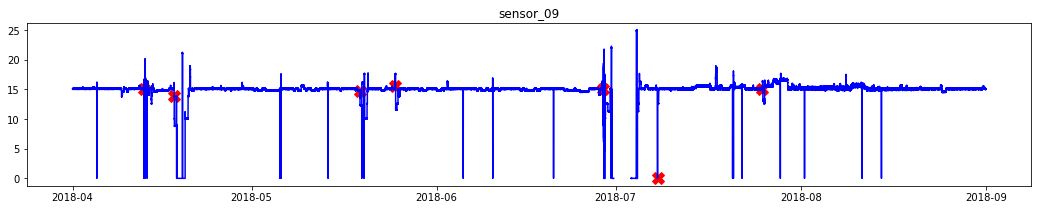

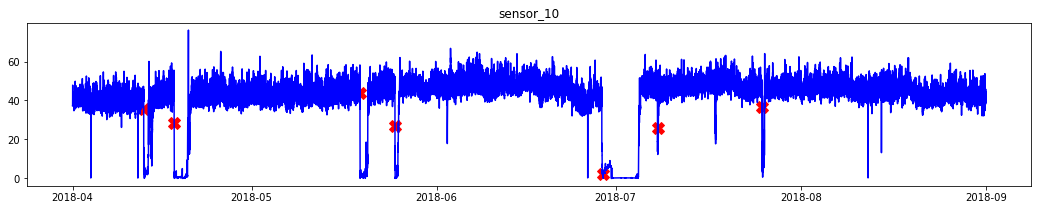

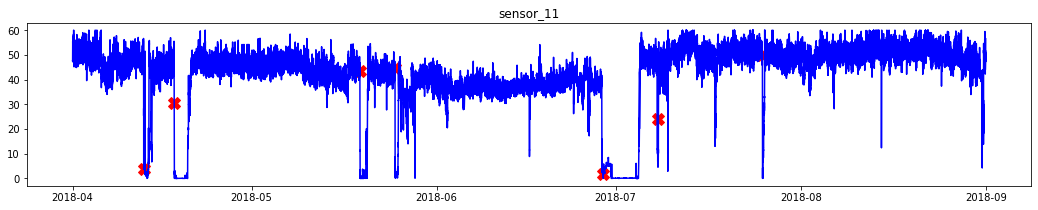

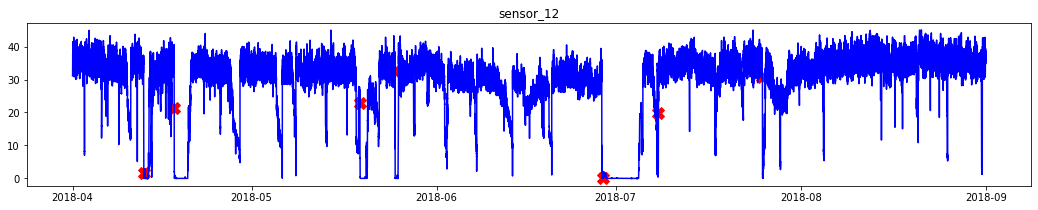

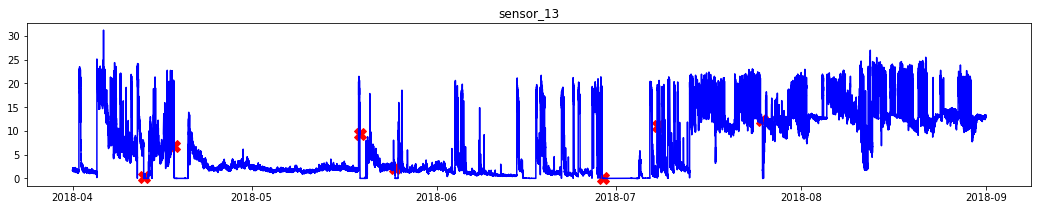

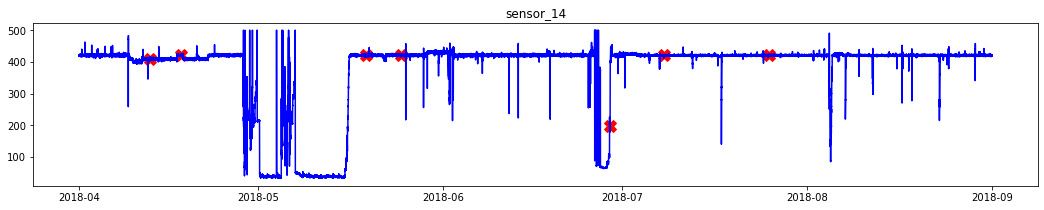

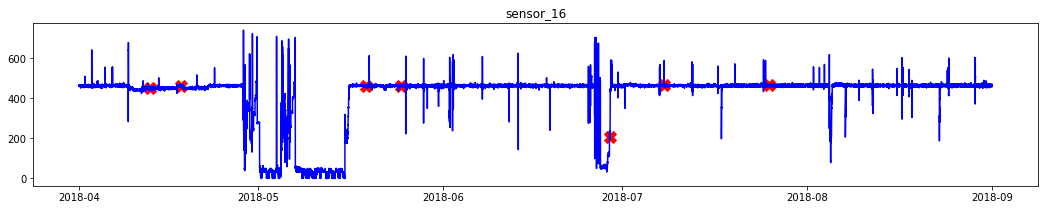

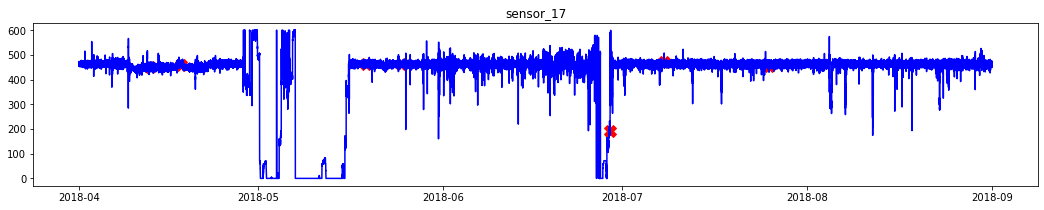

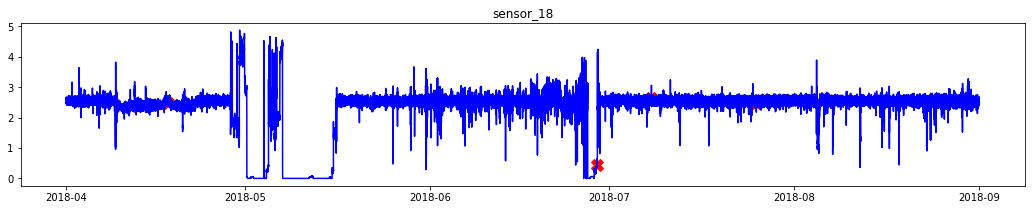

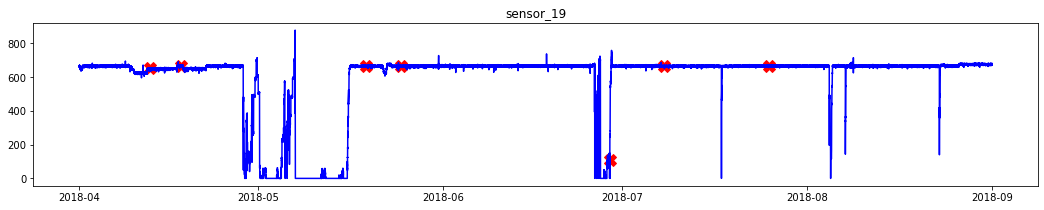

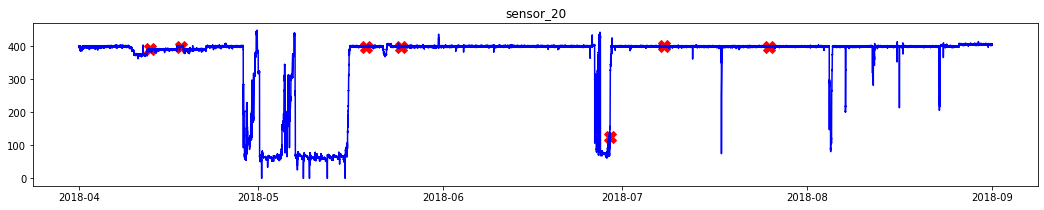

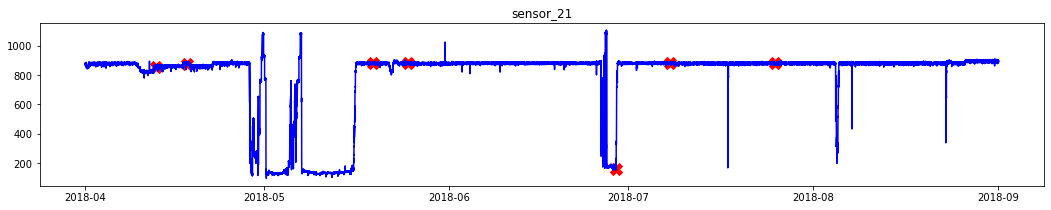

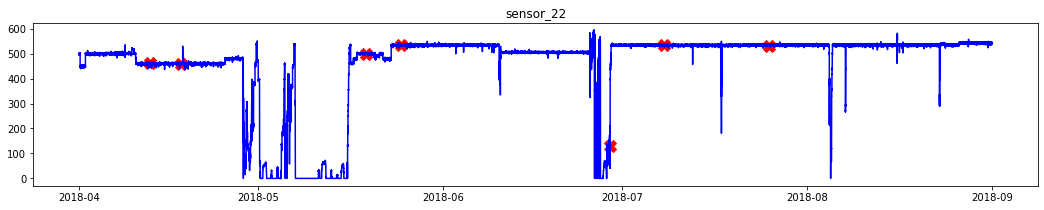

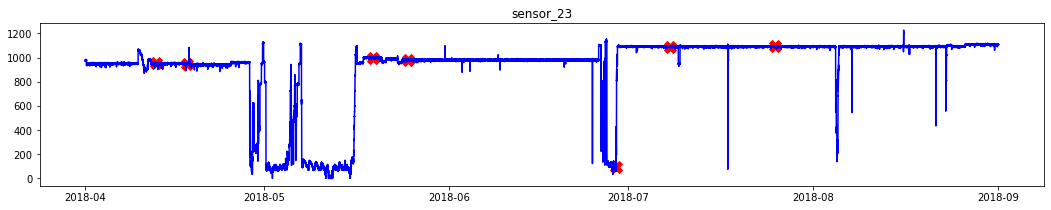

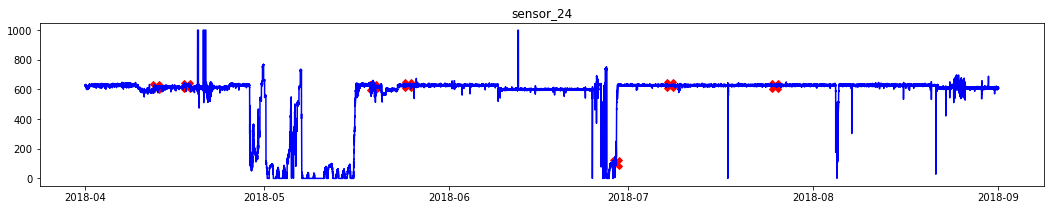

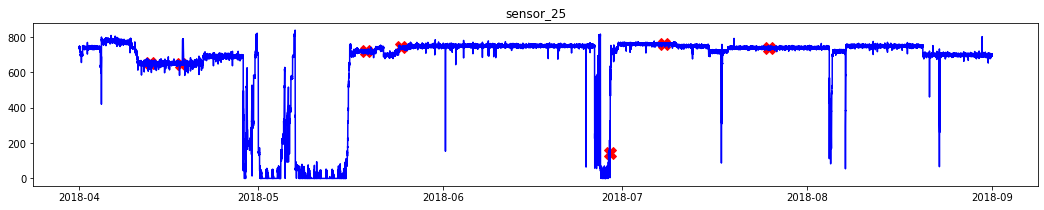

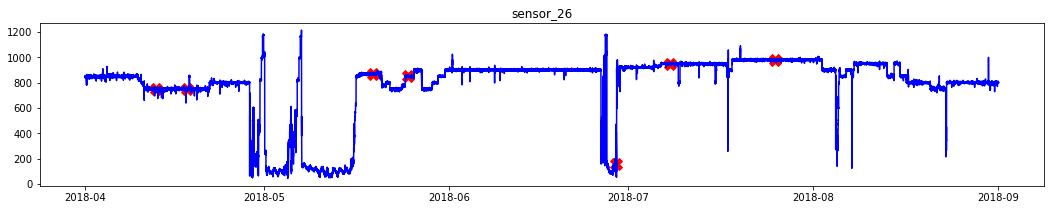

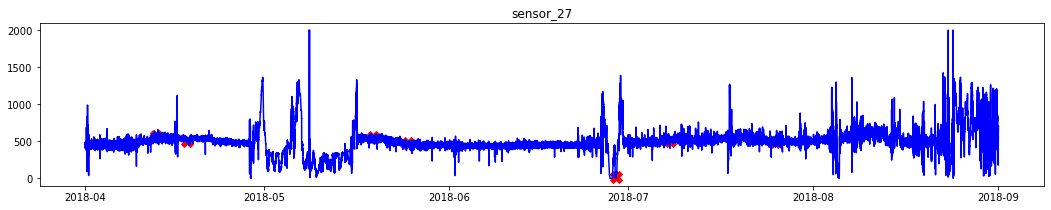

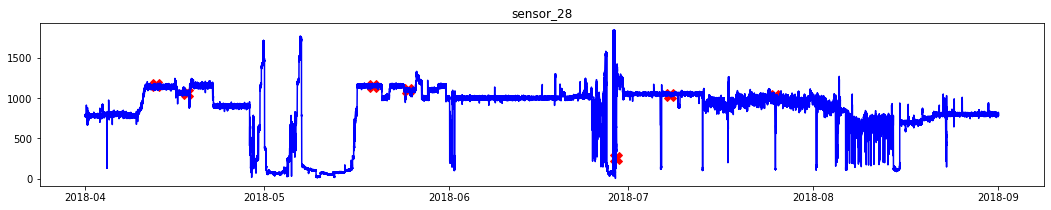

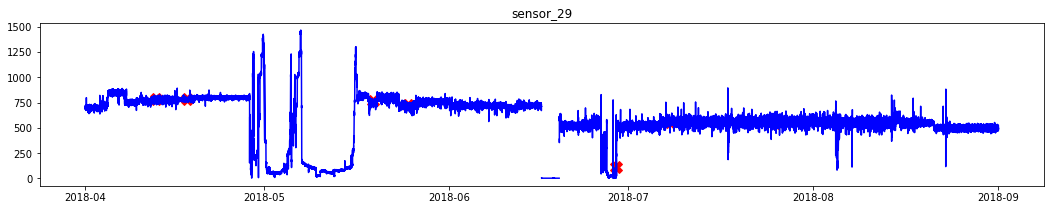

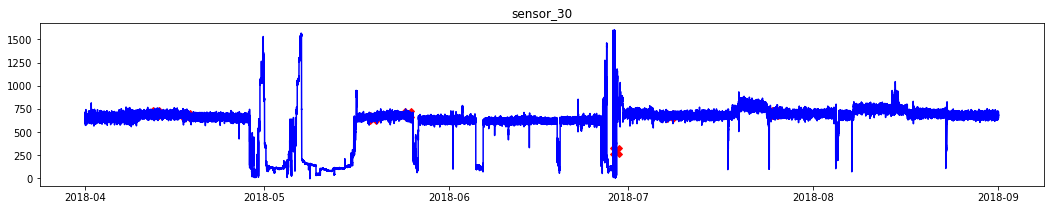

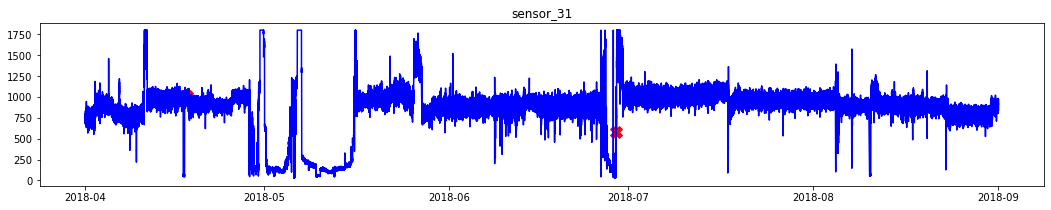

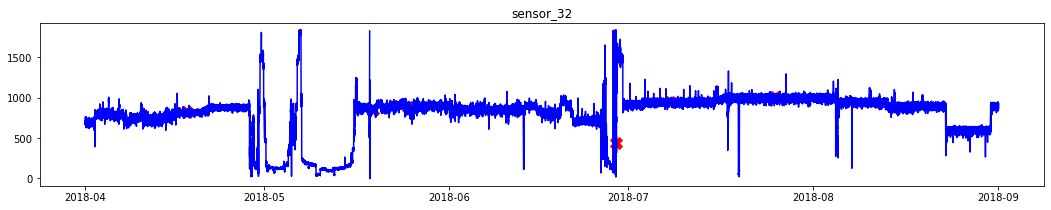

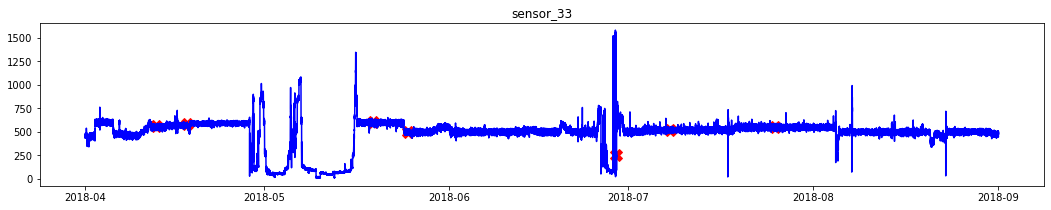

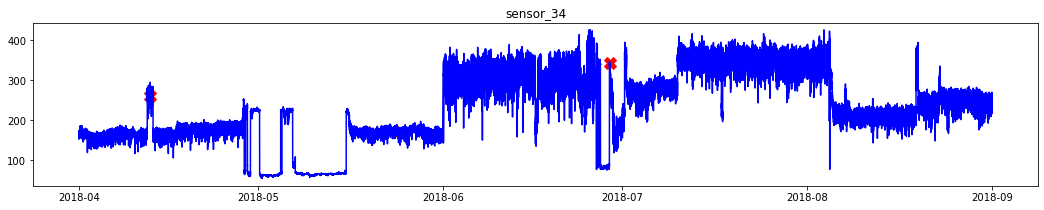

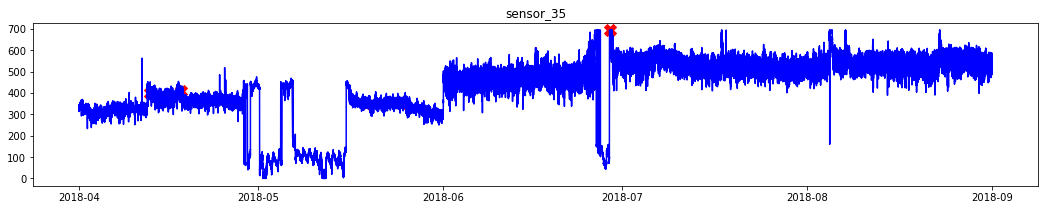

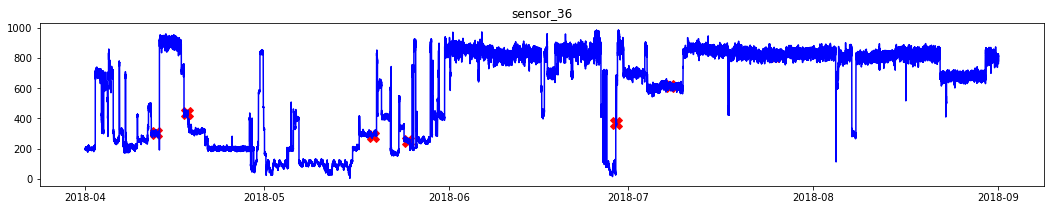

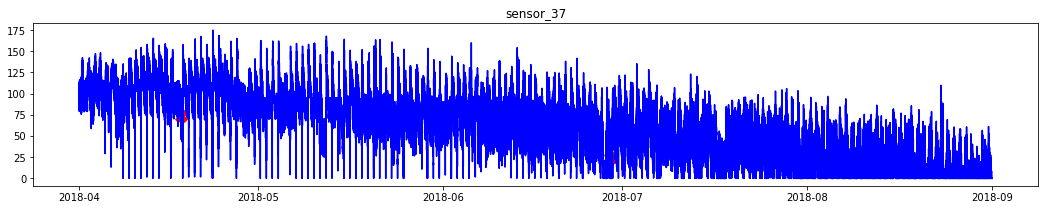

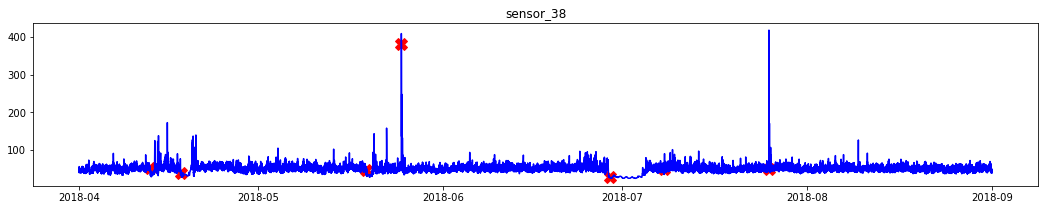

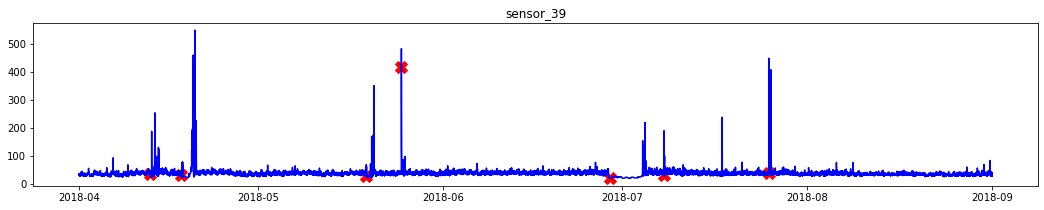

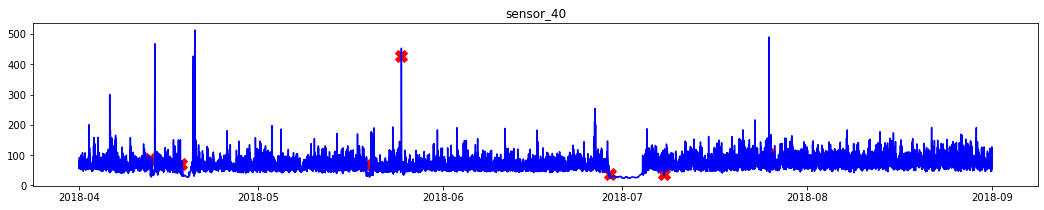

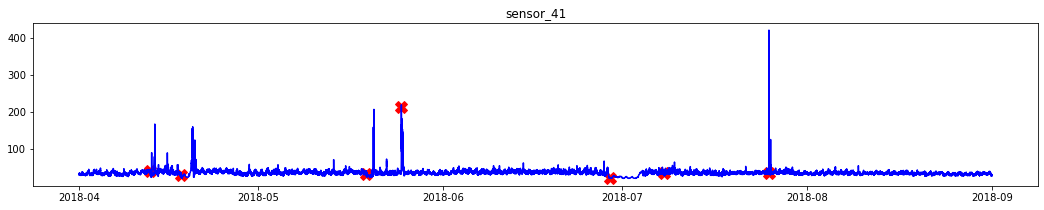

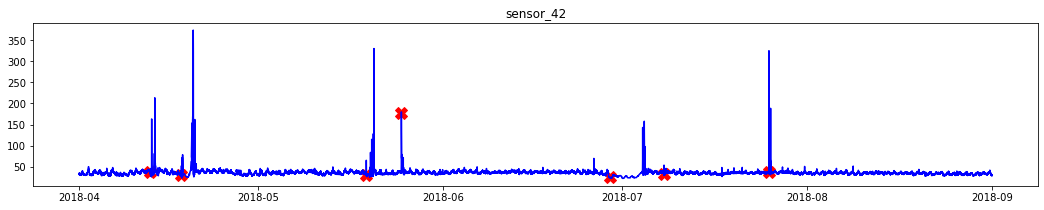

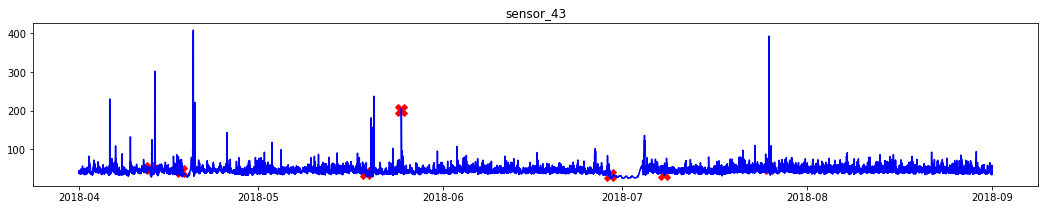

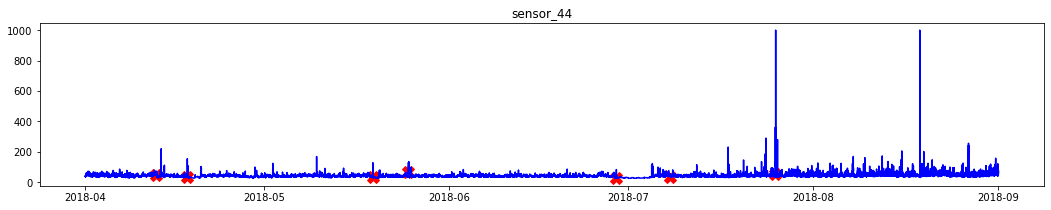

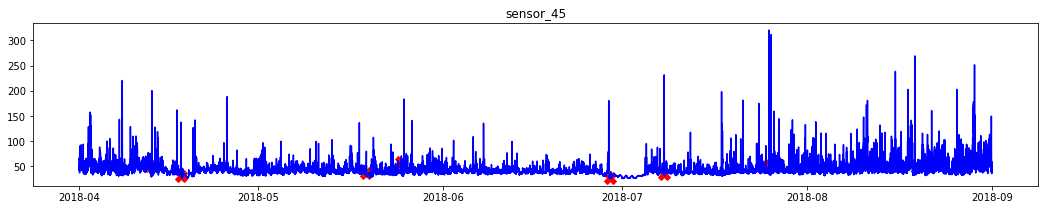

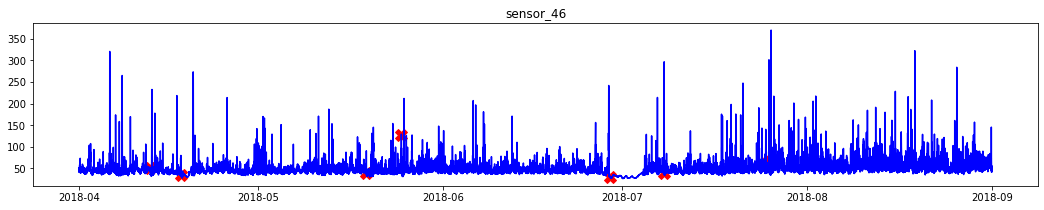

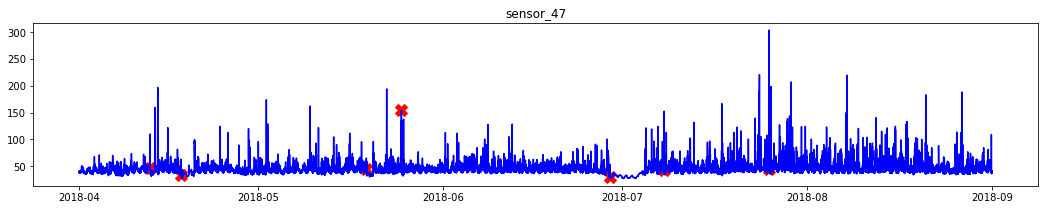

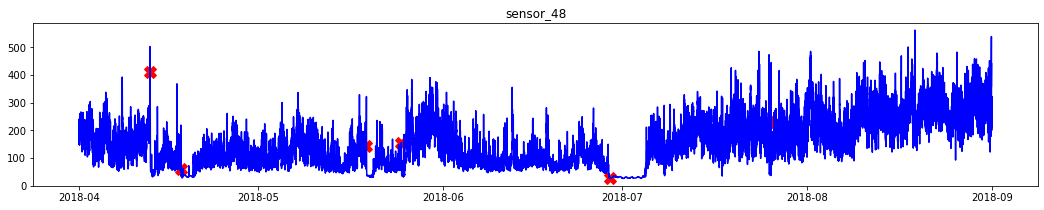

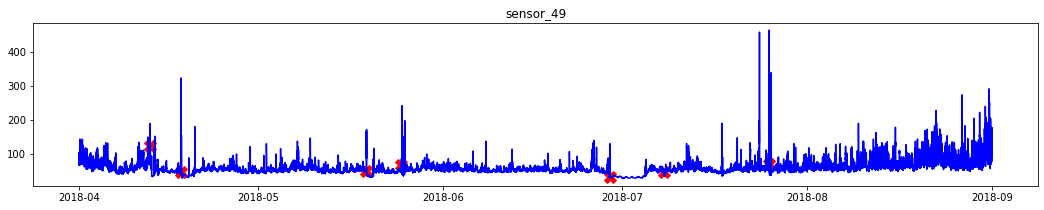

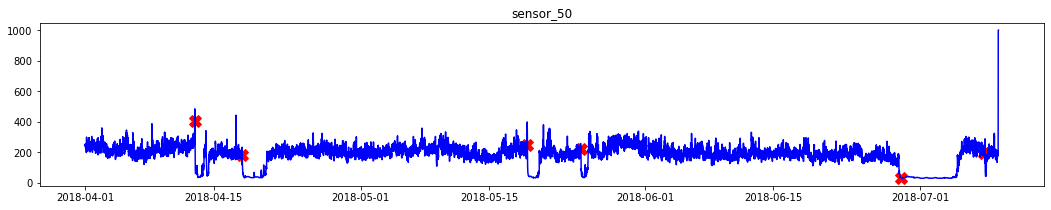

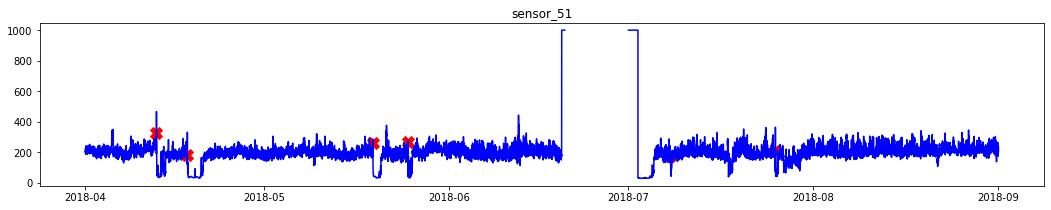

In [14]:
broken=df[df['machine_status']=='BROKEN']
for name in NUMERICAL:
    _ = plt.figure(figsize=(18,3))
    _ = plt.plot(broken[name], linestyle='none', marker='X', color='red', markersize=12)
    _ = plt.plot(df[name], color='blue')
    _ = plt.title(name)
    plt.show()

In [15]:
rollmean = df.resample(rule='D').mean()
rollstd = df.resample(rule='D').std()

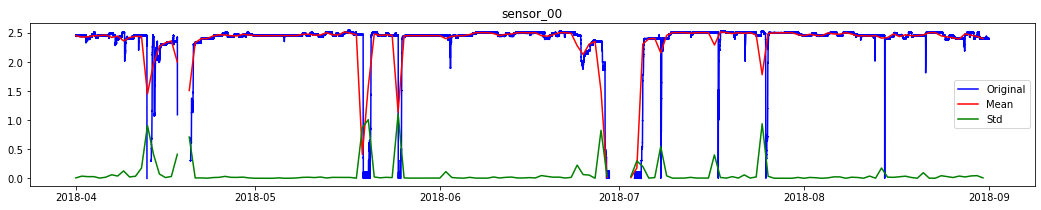

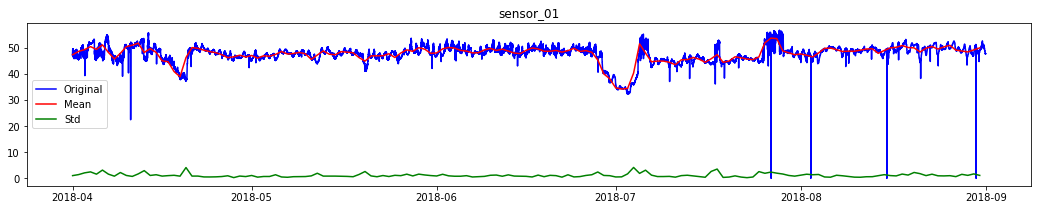

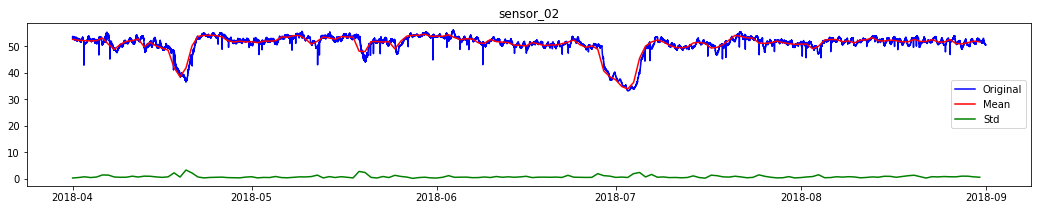

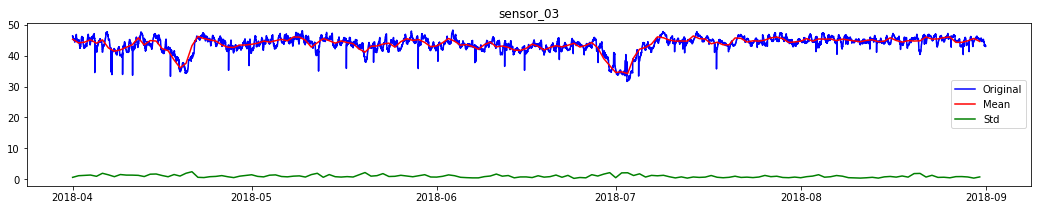

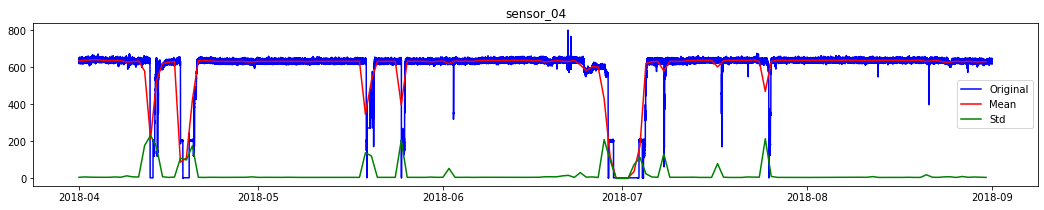

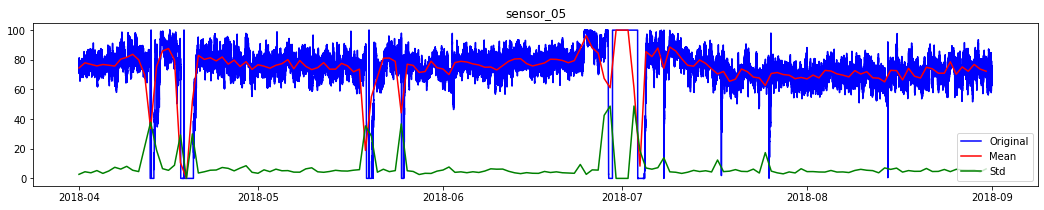

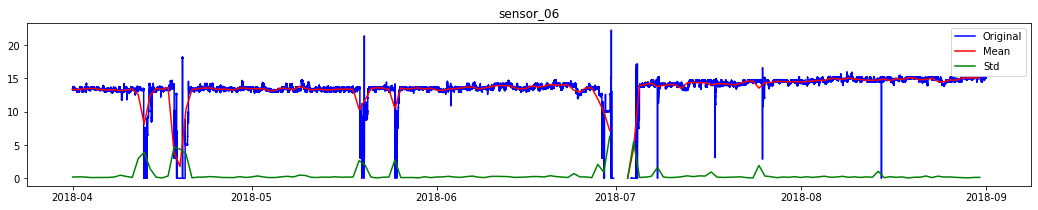

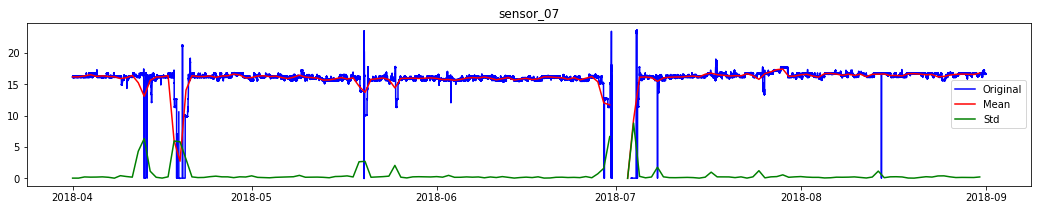

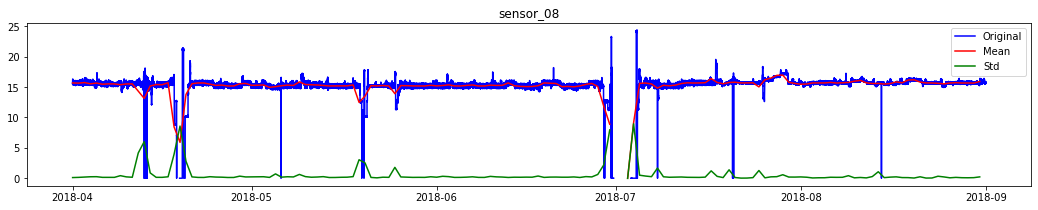

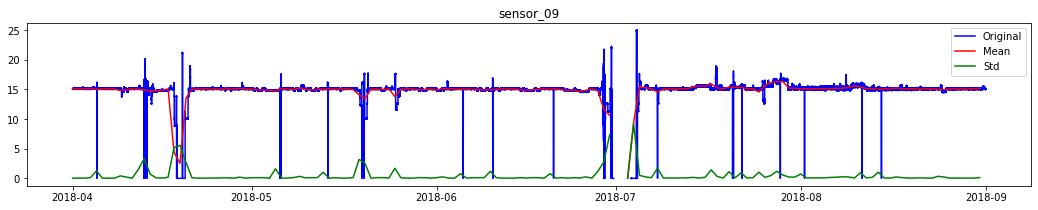

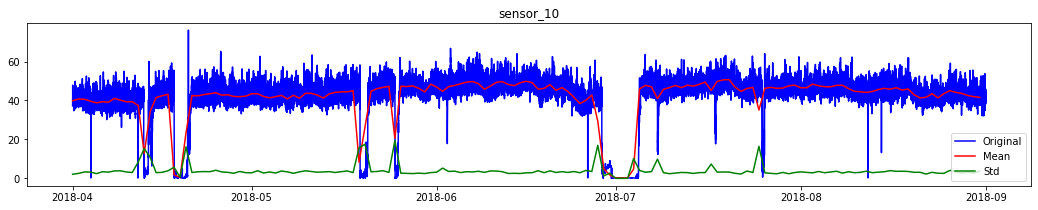

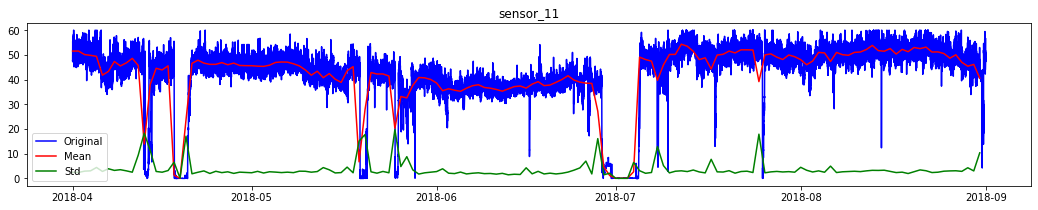

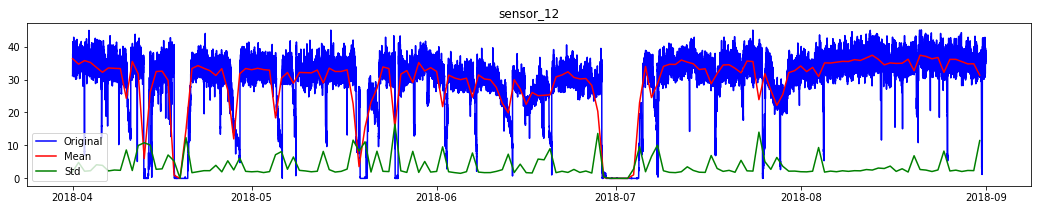

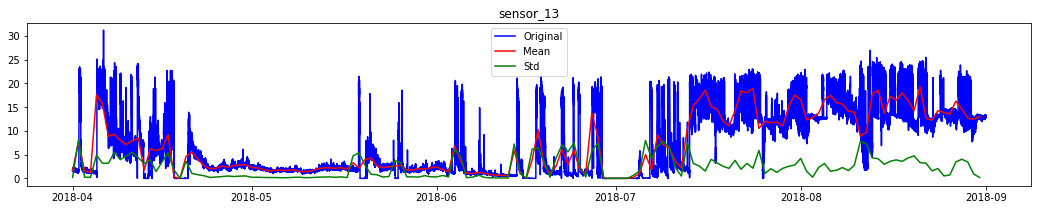

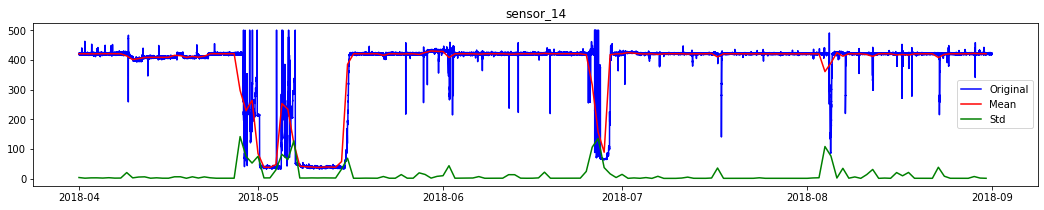

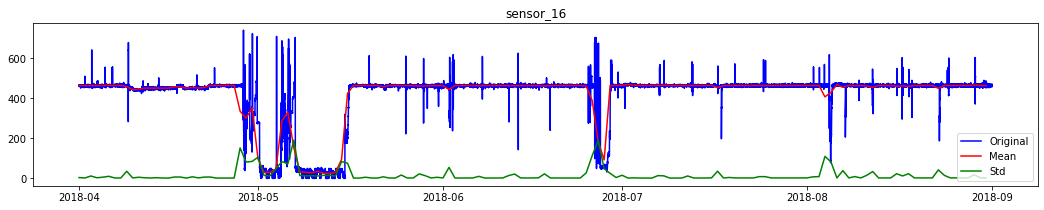

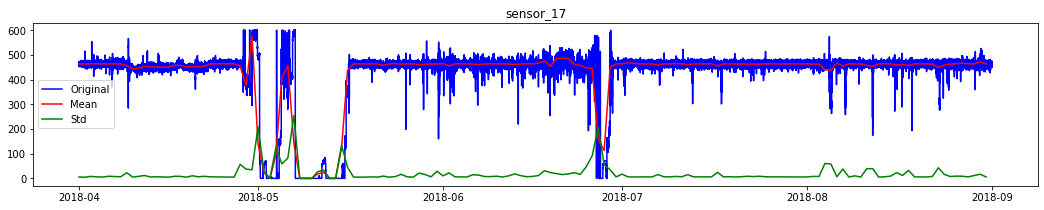

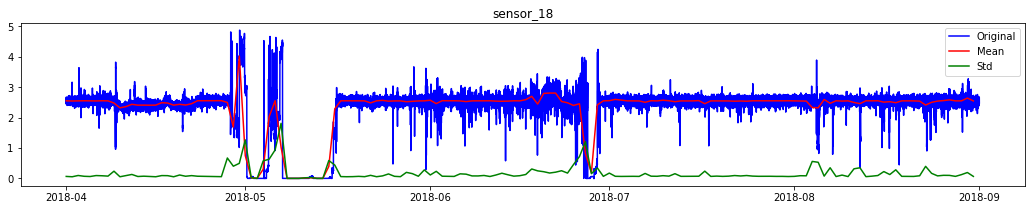

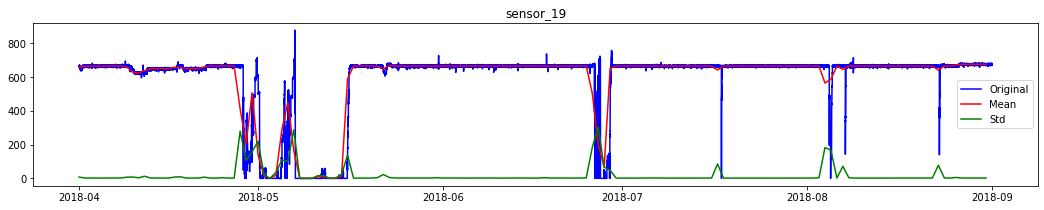

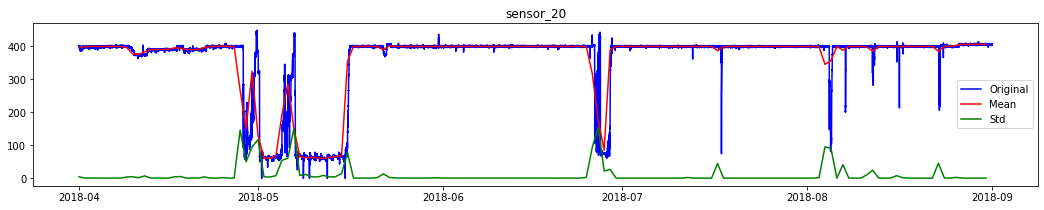

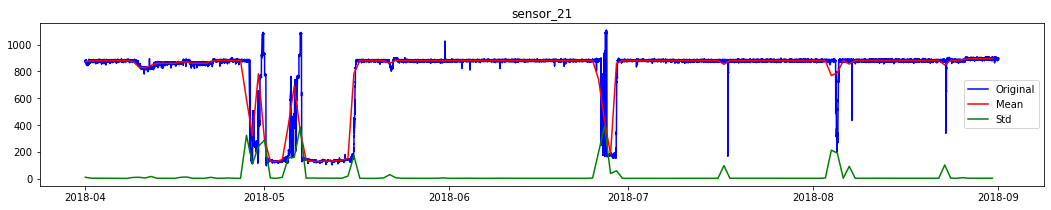

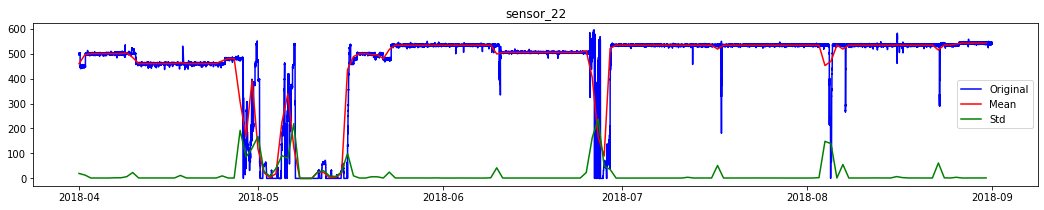

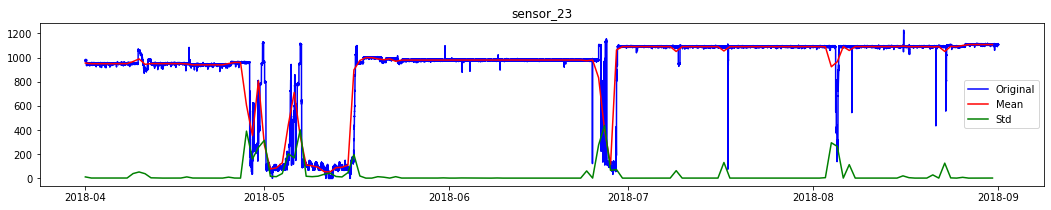

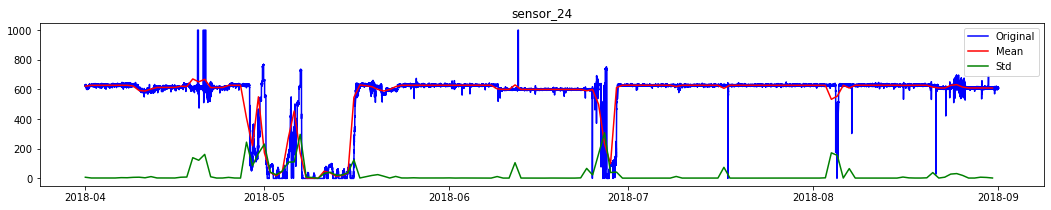

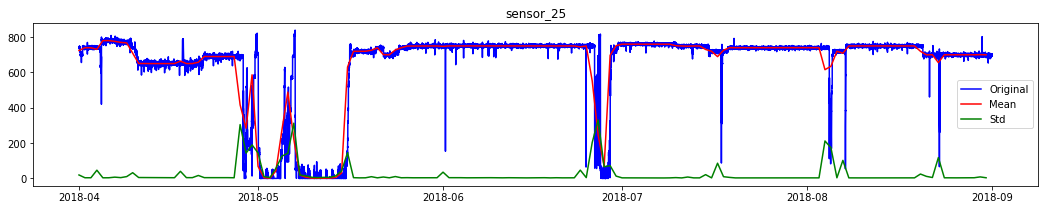

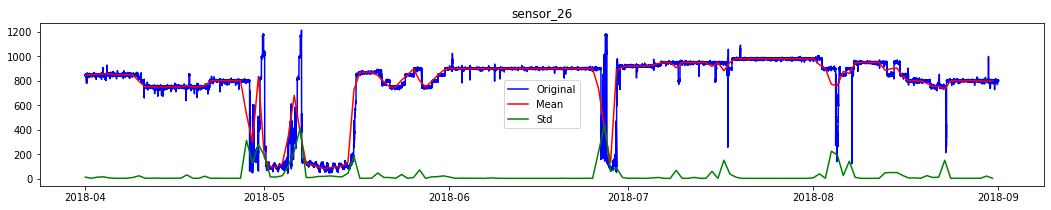

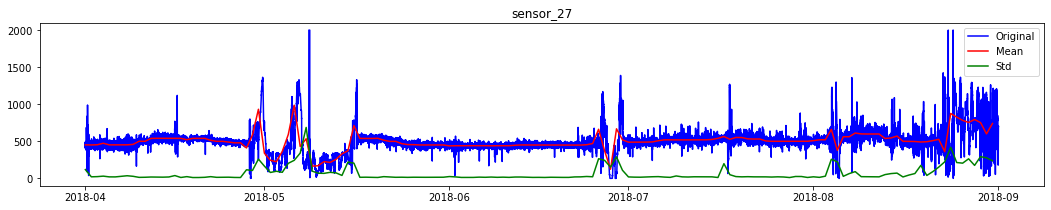

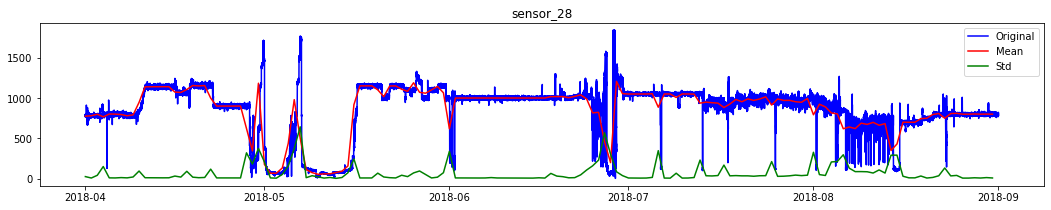

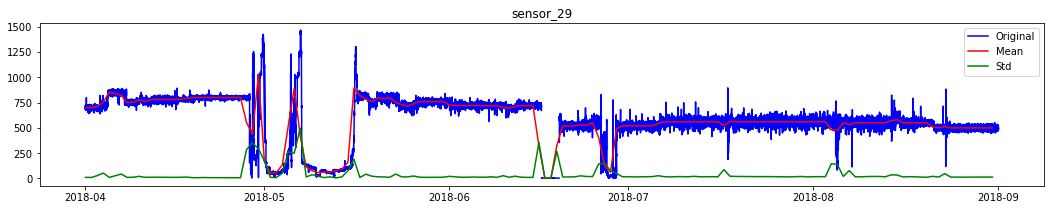

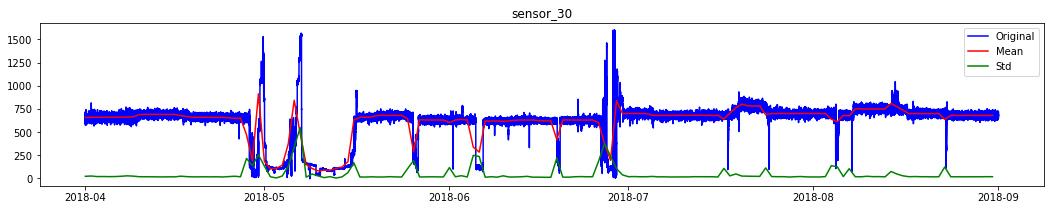

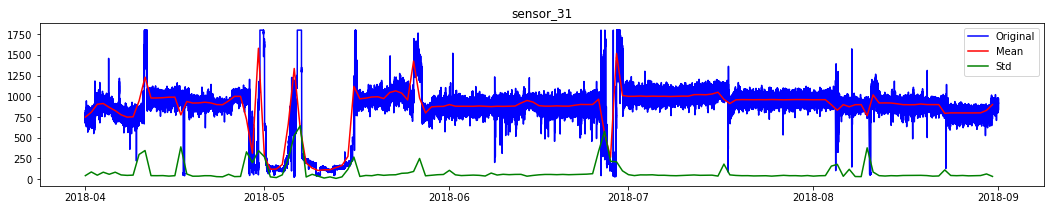

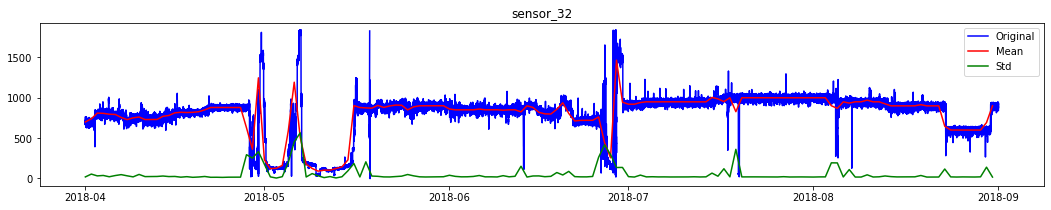

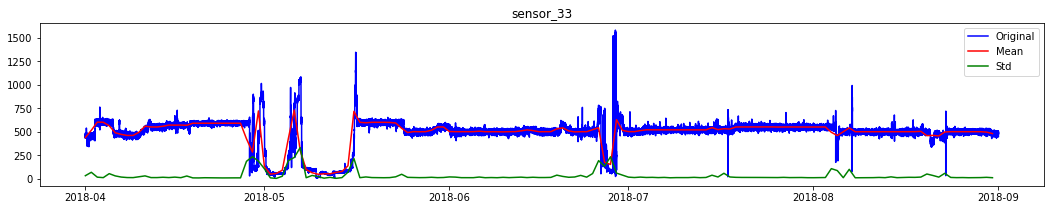

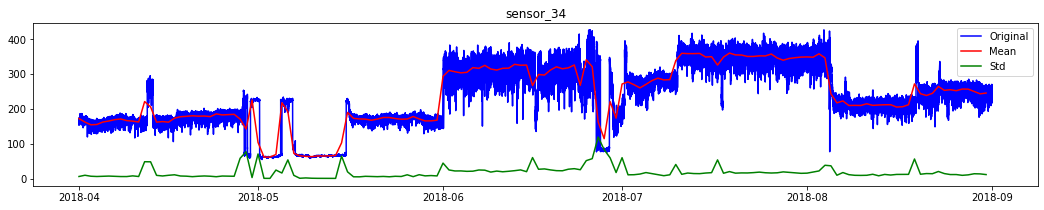

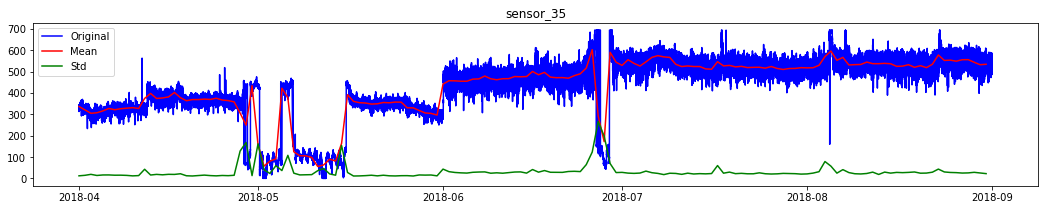

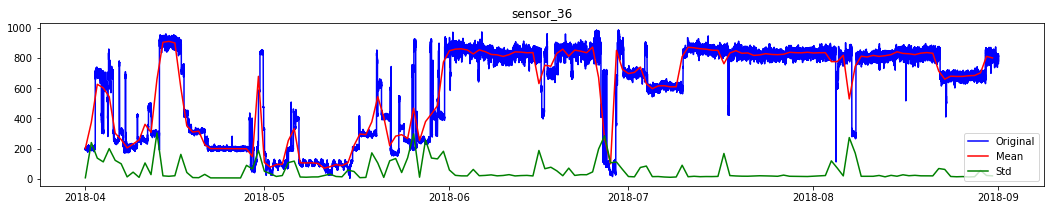

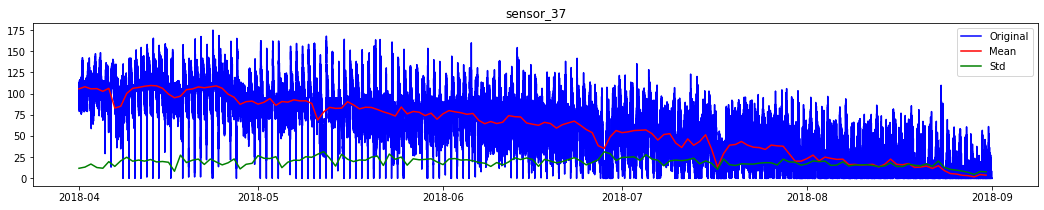

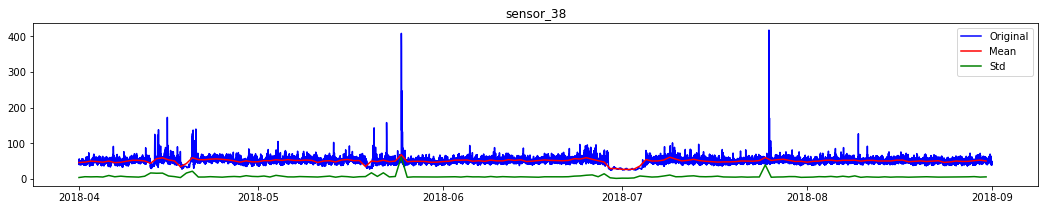

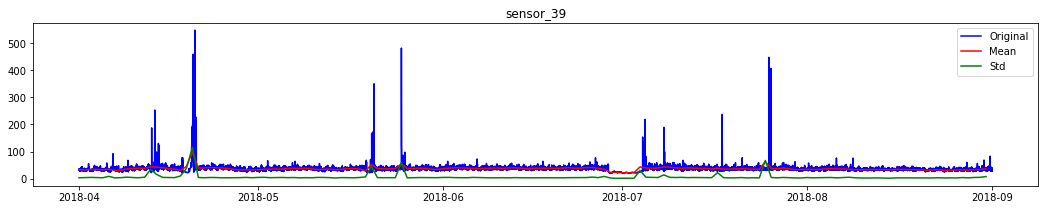

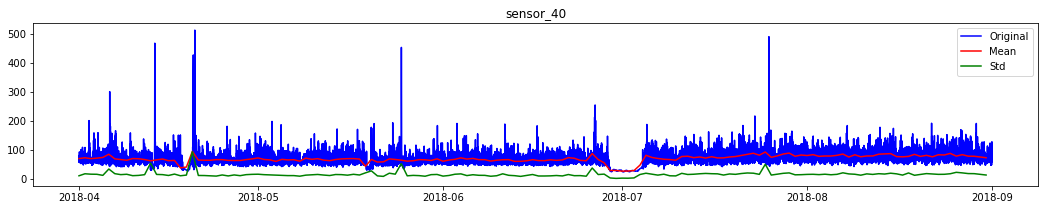

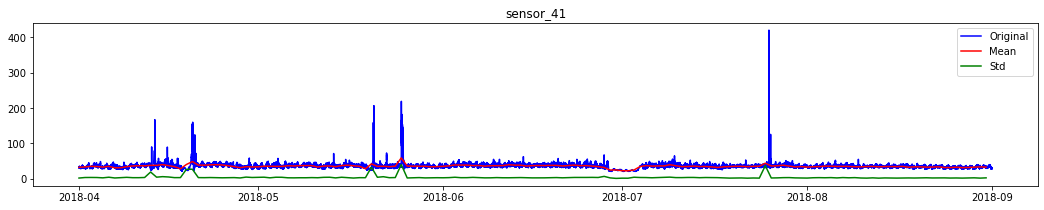

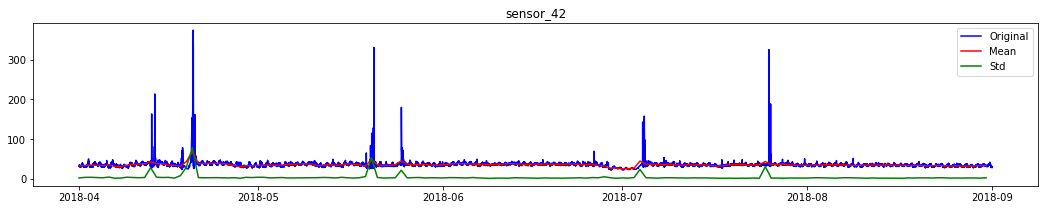

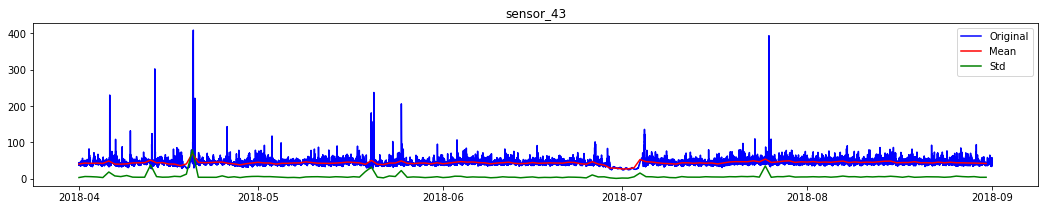

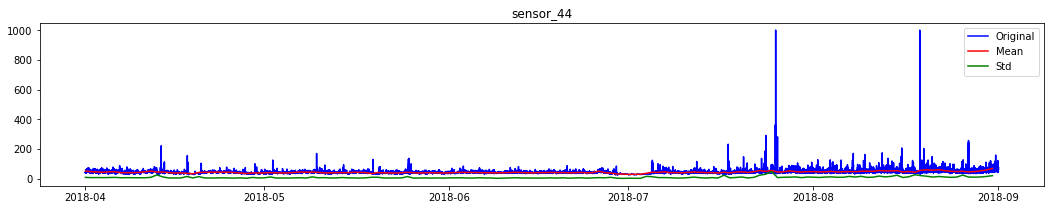

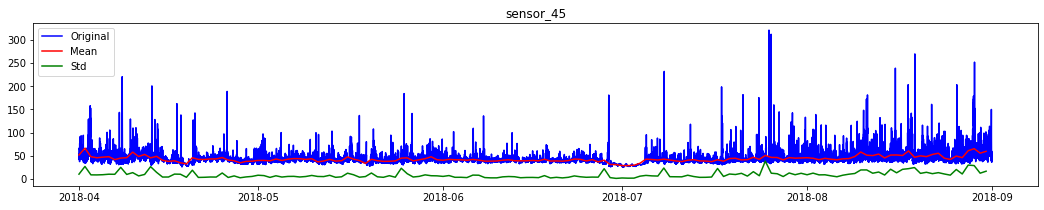

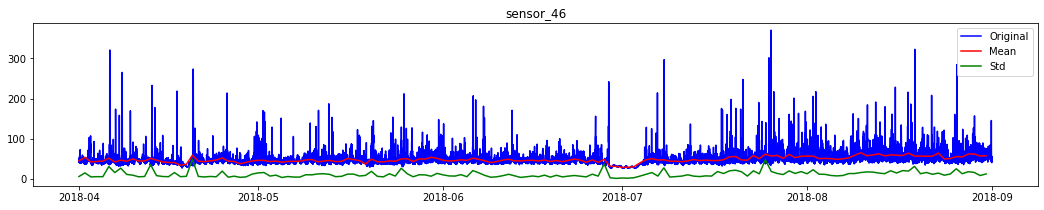

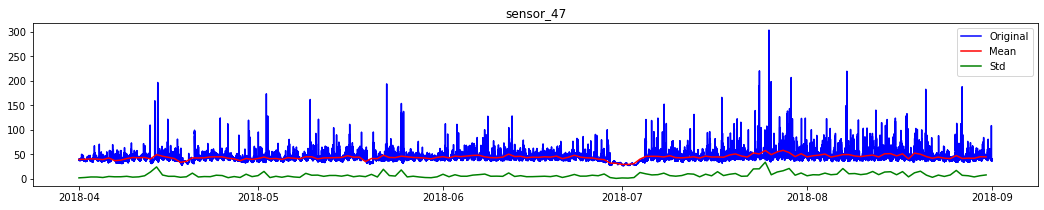

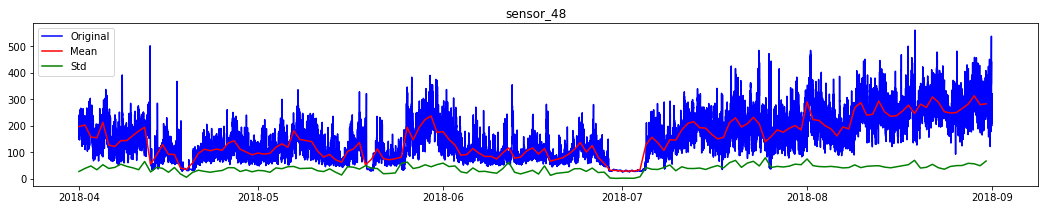

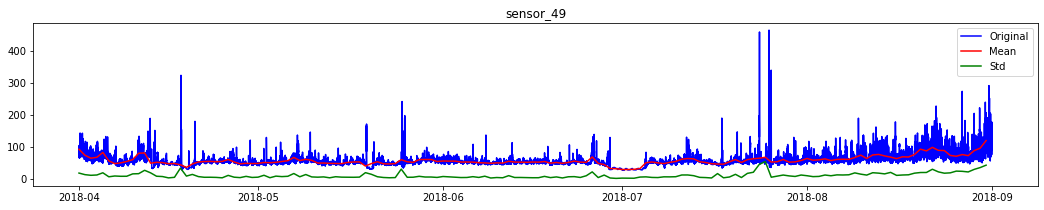

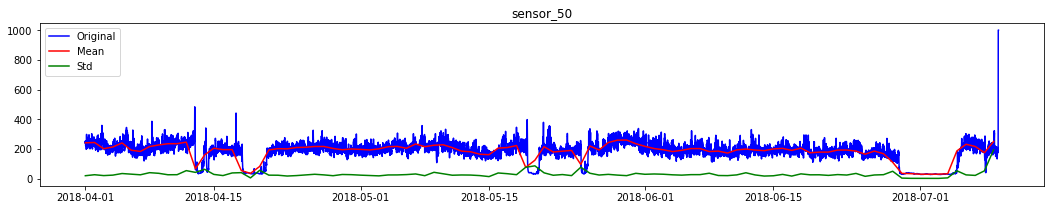

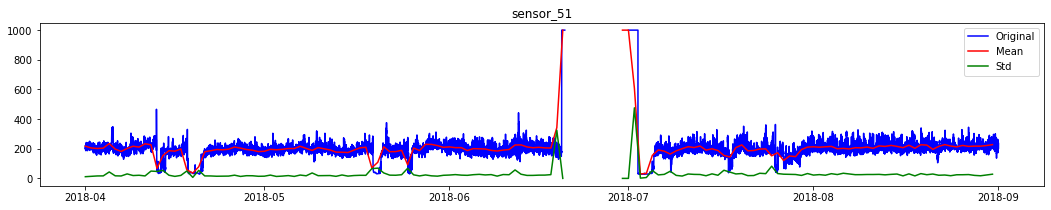

In [16]:
for name in NUMERICAL:
    _ = plt.figure(figsize=(18,3))
    _ = plt.plot(df[name],color='Blue',label='Original')
    _ = plt.plot(rollmean[name],color='Red',label='Mean')
    _ = plt.plot(rollstd[name],color='Green',label='Std')
    _ = plt.legend(loc='best')
    _ = plt.title(name)
    plt.show()

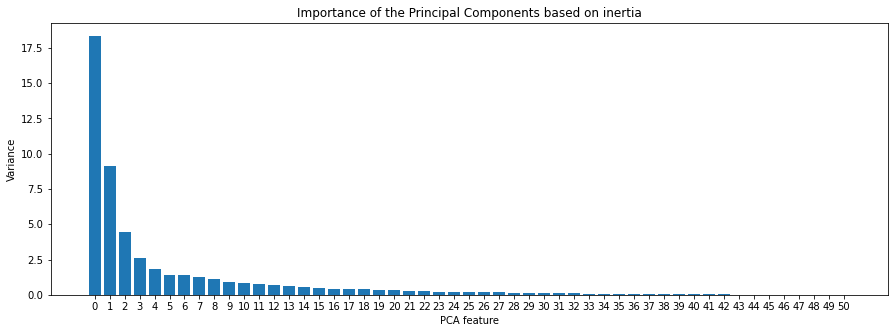

In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

# Extract the names of the numerical columns

x = df[NUMERICAL].dropna()
scaler = StandardScaler()
pca = PCA()
pipeline = make_pipeline(scaler, pca)
pipeline.fit(x)
# Plot the principal components against their inertia
features = range(pca.n_components_)
_ = plt.figure(figsize=(15, 5))
_ = plt.bar(features, pca.explained_variance_)
_ = plt.xlabel('PCA feature')
_ = plt.ylabel('Variance')
_ = plt.xticks(features)
_ = plt.title("Importance of the Principal Components based on inertia")
plt.show()

In [18]:
x

sensor_00  sensor_01  sensor_02  sensor_03  sensor_04  \
date                                                                         
2018-04-01 00:00:00   2.465394  47.092010   53.21180  46.310760   634.3750   
2018-04-01 00:01:00   2.465394  47.092010   53.21180  46.310760   634.3750   
2018-04-01 00:02:00   2.444734  47.352430   53.21180  46.397570   638.8889   
2018-04-01 00:03:00   2.460474  47.092010   53.16840  46.397568   628.1250   
2018-04-01 00:04:00   2.445718  47.135410   53.21180  46.397568   636.4583   
...                        ...        ...        ...        ...        ...   
2018-07-09 12:39:00   2.474248  45.138885   51.86632  46.440970   636.5741   
2018-07-09 12:40:00   2.476215  45.138890   51.86632  46.440971   621.7593   
2018-07-09 12:41:00   2.468345  45.182290   51.82291  46.440971   626.2731   
2018-07-09 12:42:00   2.479167  45.138890   51.86632  46.440971   631.9445   
2018-07-09 12:43:00   2.466377  45.138885   51.86632  46.440971   630.9028   

                     sensor_05  sensor_06  sensor_07  sensor_08  sensor_09  \
date                                                                         
2018-04-01 00:00:00   76.45975   13.41146   16.13136   15.56713   15.05353   
2018-04-01 00:01:00   76.45975   13.41146   16.13136   15.56713   15.05353   
2018-04-01 00:02:00   73.54598   13.32465   16.03733   15.61777   15.01013   
2018-04-01 00:03:00   76.98898   13.31742   16.24711   15.69734   15.08247   
2018-04-01 00:04:00   76.58897   13.35359   16.21094   15.69734   15.08247   
...                        ...        ...        ...        ...        ...   
2018-07-09 12:39:00   85.04365   13.77315   16.03733   15.18374   15.11863   
2018-07-09 12:40:00   84.11448   13.89612   16.24711   15.45139   15.08247   
2018-07-09 12:41:00   84.99566   13.92506   16.13136   15.37182   15.11863   
2018-07-09 12:42:00   85.67138   13.78038   16.24711   14.96672   15.05353   
2018-07-09 12:43:00   85.09058   13.84549   16.16753   14.98843   15.11863   

                     ...  sensor_42  sensor_43  sensor_44  sensor_45  \
date                 ...                                               
2018-04-01 00:00:00  ...  31.770832   41.92708  39.641200   65.68287   
2018-04-01 00:01:00  ...  31.770832   41.92708  39.641200   65.68287   
2018-04-01 00:02:00  ...  31.770830   41.66666  39.351852   65.39352   
2018-04-01 00:03:00  ...  31.510420   40.88541  39.062500   64.81481   
2018-04-01 00:04:00  ...  31.510420   41.40625  38.773150   65.10416   
...                  ...        ...        ...        ...        ...   
2018-07-09 12:39:00  ...  40.885410   43.48958  39.641205   42.53472   
2018-07-09 12:40:00  ...  40.625000   44.79166  39.641205   42.53472   
2018-07-09 12:41:00  ...  40.364580   45.83333  39.641200   42.24537   
2018-07-09 12:42:00  ...  40.625000   46.61458  40.219910   42.53472   
2018-07-09 12:43:00  ...  40.625000   46.87500  40.798610   43.40278   

                     sensor_46  sensor_47  sensor_48  sensor_49  sensor_50  \
date                                                                         
2018-04-01 00:00:00   50.92593  38.194440   157.9861  67.708340   243.0556   
2018-04-01 00:01:00   50.92593  38.194440   157.9861  67.708340   243.0556   
2018-04-01 00:02:00   51.21528  38.194443   155.9606  67.129630   241.3194   
2018-04-01 00:03:00   51.21528  38.194440   155.9606  66.840280   240.4514   
2018-04-01 00:04:00   51.79398  38.773150   158.2755  66.550930   242.1875   
...                        ...        ...        ...        ...        ...   
2018-07-09 12:39:00   58.44907  43.981480   169.8495  53.530094  1000.0000   
2018-07-09 12:40:00   57.87037  45.138890   169.8495  53.530094  1000.0000   
2018-07-09 12:41:00   56.42361  46.296300   167.8241  53.530094  1000.0000   
2018-07-09 12:42:00   54.97685  47.743060   162.6157  53.530094  1000.0000   
2018-07-09 12:43:00   53.53009  49.479170   158.8542  53.530090  1000.0000   

                     sensor_51  
date  

In [19]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, columns = ['pc1', 'pc2'])

# <span style='color:blue;'> Augmented Dickey Fuller Test for Autocorrelation </span>

In [20]:
from statsmodels.tsa.stattools import adfuller
# Run Augmented Dickey Fuller Test
result = adfuller(principalDf['pc1'])
# Print p-value
print(result[1])

0.04261171205550254


In [21]:
result = adfuller(principalDf['pc2'])
# Print p-value
print(result[1])

6.692823215480537e-05


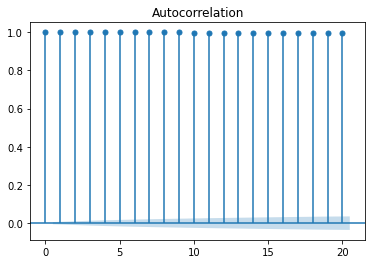

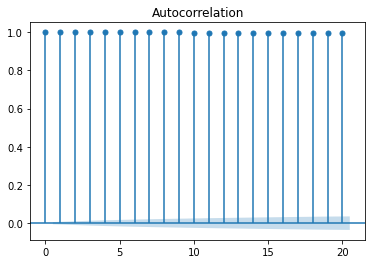

In [22]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(principalDf.iloc[:,0], lags=20, alpha=0.05)

# <span style='color:blue;'> Anomaly Detection </span>

+ Benchmark model: Interquartile Range (IQR)
+ K-Means clustering
+ Isolation Forest

## <span style='color:red;'> IQR </span>
+ Calculate IQR which is the difference between 75th (Q3)and 25th (Q1) percentiles.
+ Calculate upper and lower bounds for the outlier.
+ Filter the data points that fall outside the upper and lower bounds and flag them as outliers.
+ Finally, plot the outliers on top of the time series data (the readings from sensor_11 in this case)

In [23]:
df_IQR = pd.concat([x.reset_index(),principalDf],axis=1)
df_IQR.set_index('date',inplace=True)

In [24]:
# Calculate IQR for the 1st principal component (pc1)
q1_pc1, q3_pc1 = df_IQR['pc1'].quantile([0.25, 0.75])
iqr_pc1 = q3_pc1 - q1_pc1

# Calculate upper and lower bounds for outlier for pc1
lower_pc1 = q1_pc1 - (1.5*iqr_pc1)
upper_pc1 = q3_pc1 + (1.5*iqr_pc1)

# Filter out the outliers from the pc1
df_IQR['anomaly_pc1'] = ((df_IQR['pc1']>upper_pc1) | (df_IQR['pc1']<lower_pc1)).astype('int')

# Calculate IQR for the 2nd principal component (pc2)
q1_pc2, q3_pc2 = df_IQR['pc2'].quantile([0.25, 0.75])
iqr_pc2 = q3_pc2 - q1_pc2

# Calculate upper and lower bounds for outlier for pc2
lower_pc2 = q1_pc2 - (1.5*iqr_pc2)
upper_pc2 = q3_pc2 + (1.5*iqr_pc2)

# Filter out the outliers from the pc2
df_IQR['anomaly_pc2'] = ((df_IQR['pc2']>upper_pc2) | (df_IQR['pc2']<lower_pc2)).astype('int')

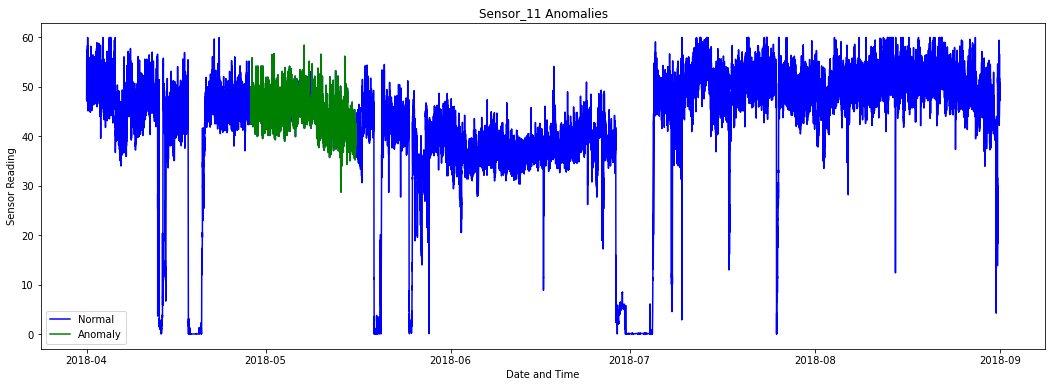

In [79]:
a = df_IQR[df_IQR['anomaly_pc1'] == 1] #anomaly
_ = plt.figure(figsize=(18,6))

_ = plt.plot(df['sensor_11'], color='blue', label='Normal')

_ = plt.plot(a['sensor_11'], color='Green', markersize=12, label='Anomaly')

_ = plt.xlabel('Date and Time')
_ = plt.ylabel('Sensor Reading')
_ = plt.title('Sensor_11 Anomalies')
_ = plt.legend(loc='best')
plt.show();

In [26]:
t = df.head()
t

sensor_00  sensor_01  sensor_02  sensor_03  sensor_04  \
date                                                                         
2018-04-01 00:00:00   2.465394   47.09201    53.2118  46.310760   634.3750   
2018-04-01 00:01:00   2.465394   47.09201    53.2118  46.310760   634.3750   
2018-04-01 00:02:00   2.444734   47.35243    53.2118  46.397570   638.8889   
2018-04-01 00:03:00   2.460474   47.09201    53.1684  46.397568   628.1250   
2018-04-01 00:04:00   2.445718   47.13541    53.2118  46.397568   636.4583   

                     sensor_05  sensor_06  sensor_07  sensor_08  sensor_09  \
date                                                                         
2018-04-01 00:00:00   76.45975   13.41146   16.13136   15.56713   15.05353   
2018-04-01 00:01:00   76.45975   13.41146   16.13136   15.56713   15.05353   
2018-04-01 00:02:00   73.54598   13.32465   16.03733   15.61777   15.01013   
2018-04-01 00:03:00   76.98898   13.31742   16.24711   15.69734   15.08247   
2018-04-01 00:04:00   76.58897   13.35359   16.21094   15.69734   15.08247   

                     ...  sensor_43  sensor_44  sensor_45  sensor_46  \
date                 ...                                               
2018-04-01 00:00:00  ...   41.92708  39.641200   65.68287   50.92593   
2018-04-01 00:01:00  ...   41.92708  39.641200   65.68287   50.92593   
2018-04-01 00:02:00  ...   41.66666  39.351852   65.39352   51.21528   
2018-04-01 00:03:00  ...   40.88541  39.062500   64.81481   51.21528   
2018-04-01 00:04:00  ...   41.40625  38.773150   65.10416   51.79398   

                     sensor_47  sensor_48  sensor_49  sensor_50  sensor_51  \
date                                                                         
2018-04-01 00:00:00  38.194440   157.9861   67.70834   243.0556   201.3889   
2018-04-01 00:01:00  38.194440   157.9861   67.70834   243.0556   201.3889   
2018-04-01 00:02:00  38.194443   155.9606   67.12963   241.3194   203.7037   
2018-04-01 00:03:00  38.194440   155.9606   66.84028   240.4514   203.1250   
2018-04-01 00:04:00  38.773150   158.2755   66.55093   242.1875   201.3889   

                     machine_status  
date                                 
2018-04-01 00:00:00          NORMAL  
2018-04-01 00:01:00          NORMAL  
2018-04-01 00:02:00          NORMAL  
2018-04-01 00:03:00          NORMAL  
2018-04-01 00:04:00          NORMAL  

[5 rows x 52 columns]

In [27]:
mask = t.iloc[:,1] > 48.1 
t[mask] = 0

## <span style='color:red;'> K-Means CLustering </span>
Strategy:

+ Calculate the distance between each point and its nearest centroid. The biggest distances are considered as anomaly.
+ We use outliers_fraction to provide information to the algorithm about the proportion of the outliers present in our data set. Situations may vary from data set to data set. However, as a starting figure, I estimate outliers_fraction=0.13 (13% of df are outliers as depicted).
+ Calculate number_of_outliers using outliers_fraction.
+ Set threshold as the minimum distance of these outliers.
+ The anomaly result of anomaly1 contains the above method Cluster (0:normal, 1:anomaly).
+ Visualize anomalies with Time Series view.

In [29]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(principalDf.values)
labels = kmeans.predict(principalDf.values)
unique_elements, counts_elements = np.unique(labels, return_counts=True)
clusters = np.asarray((unique_elements, counts_elements))

In [39]:
kmeans.cluster_centers_
kmeans.labels_

array([0, 0, 0, ..., 0, 0, 0])

In [48]:
def getDistanceByPoint(data, model):
    """ 
    Function that calculates the distance between a point 
    and centroid of a cluster, 
    returns the distances in pandas series
    """
    distance = []
    for i in range(0,len(data)):
        Xa = np.array(data.loc[i])
        Xb = model.cluster_centers_[model.labels_[i]-1]
        distance.append(np.linalg.norm(Xa-Xb))
    return pd.Series(distance, index=data.index)

In [49]:
outliers_fraction = 0.13

In [52]:
# get the distance between each point and its nearest centroid. The biggest distances are considered as anomaly
distance = getDistanceByPoint(principalDf, kmeans)

In [53]:
number_of_outliers = int(outliers_fraction*len(distance))
# Take the minimum of the largest 13% of the distances as the threshold
threshold = distance.nlargest(number_of_outliers).min()

In [54]:
threshold

2735.496221032955

In [ ]:
principalDf['anomaly1'] = (distance >= threshold).astype(int)

## <span style='color:red;'> Isolation Forest </span>

In [65]:
df_IF = pd.concat([x.reset_index(),principalDf],axis=1)
df_IF.set_index('date',inplace=True)
df_IF.head()

sensor_00  sensor_01  sensor_02  sensor_03  sensor_04  \
date                                                                         
2018-04-01 00:00:00   2.465394   47.09201    53.2118  46.310760   634.3750   
2018-04-01 00:01:00   2.465394   47.09201    53.2118  46.310760   634.3750   
2018-04-01 00:02:00   2.444734   47.35243    53.2118  46.397570   638.8889   
2018-04-01 00:03:00   2.460474   47.09201    53.1684  46.397568   628.1250   
2018-04-01 00:04:00   2.445718   47.13541    53.2118  46.397568   636.4583   

                     sensor_05  sensor_06  sensor_07  sensor_08  sensor_09  \
date                                                                         
2018-04-01 00:00:00   76.45975   13.41146   16.13136   15.56713   15.05353   
2018-04-01 00:01:00   76.45975   13.41146   16.13136   15.56713   15.05353   
2018-04-01 00:02:00   73.54598   13.32465   16.03733   15.61777   15.01013   
2018-04-01 00:03:00   76.98898   13.31742   16.24711   15.69734   15.08247   
2018-04-01 00:04:00   76.58897   13.35359   16.21094   15.69734   15.08247   

                     ...  sensor_45  sensor_46  sensor_47  sensor_48  \
date                 ...                                               
2018-04-01 00:00:00  ...   65.68287   50.92593  38.194440   157.9861   
2018-04-01 00:01:00  ...   65.68287   50.92593  38.194440   157.9861   
2018-04-01 00:02:00  ...   65.39352   51.21528  38.194443   155.9606   
2018-04-01 00:03:00  ...   64.81481   51.21528  38.194440   155.9606   
2018-04-01 00:04:00  ...   65.10416   51.79398  38.773150   158.2755   

                     sensor_49  sensor_50  sensor_51         pc1         pc2  \
date                                                                           
2018-04-01 00:00:00   67.70834   243.0556   201.3889 -153.133434  125.889731   
2018-04-01 00:01:00   67.70834   243.0556   201.3889 -153.133434  125.889731   
2018-04-01 00:02:00   67.12963   241.3194   203.7037 -195.307008  159.980874   
2018-04-01 00:03:00   66.84028   240.4514   203.1250 -198.319514  174.653937   
2018-04-01 00:04:00   66.55093   242.1875   201.3889 -194.402134  161.620075   

                     anomaly2  
date                           
2018-04-01 00:00:00         1  
2018-04-01 00:01:00         1  
2018-04-01 00:02:00         1  
2018-04-01 00:03:00         1  
2018-04-01 00:04:00         1  

[5 rows x 54 columns]

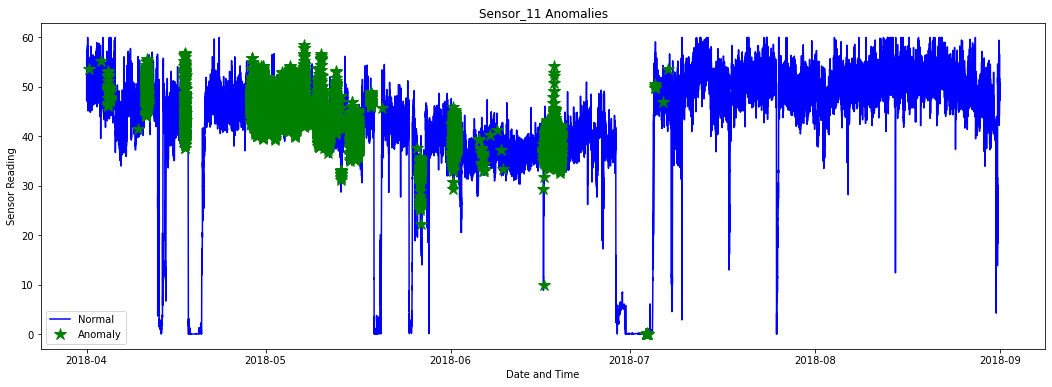

In [87]:
# Import IsolationForest
from sklearn.ensemble import IsolationForest
# Assume that 13% of the entire data set are anomalies

outliers_fraction = 0.13
model =  IsolationForest(contamination=outliers_fraction)
model.fit(principalDf.values) 
principalDf['anomaly2'] = pd.Series(model.predict(principalDf.values))
# visualization
df_if['anomaly2'] = pd.Series(principalDf['anomaly2'].values, index=df_IF.index)
a = df_IF.loc[df_IF['anomaly2'] == -1] #anomaly
fig = plt.figure(figsize=(18,6))
_ = plt.plot(df['sensor_11'], color='blue', label='Normal')
_ = plt.plot(a['sensor_11'], linestyle='none', marker='*', color='green', markersize=12, label='Anomaly')
_ = plt.xlabel('Date and Time')
_ = plt.ylabel('Sensor Reading')
_ = plt.title('Sensor_11 Anomalies')
_ = plt.legend(loc='best')
plt.show();


# import plotly.tools as tls
# plotly_fig = tls.mpl_to_plotly(fig)

In [ ]:
s